In [2]:
import sys
import os
import importlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.preprocessing import normalize
sys.path.insert(0, os.path.join(os.getcwd(),"..","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","data"))
sys.path.insert(0, os.path.join(os.getcwd(),"..","src","model"))
from DataLoader import DataLoader

In [3]:
import pandas as pd

d_train = DataLoader()
d_train.papers(["2013","2014","2015"]).abstracts().conferences().conferenceseries()

d_test = DataLoader()
d_test.papers(["2016"]).abstracts().conferences().conferenceseries()

d_train.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)
d_test.data.drop(
    list(d_test.data[pd.isnull(d_test.data.chapter_abstract)].index),
    inplace=True
)

Process 'chapters_books_2013' not in memory yet.
Process 'chapters_bookeditions_2013' not in memory yet.
Process 'chapters_2013#title' not in memory yet.
Process 'chapters_2013#language' not in memory yet.
Process 'chapters_books_2014' not in memory yet.
Process 'chapters_bookeditions_2014' not in memory yet.
Process 'chapters_2014#title' not in memory yet.
Process 'chapters_2014#language' not in memory yet.
Process 'chapters_books_2015' not in memory yet.
Process 'chapters_bookeditions_2015' not in memory yet.
Process 'chapters_2015#title' not in memory yet.
Process 'chapters_2015#language' not in memory yet.
Process 'chapters_2013#abstract' not in memory yet.
Process 'chapters_2014#abstract' not in memory yet.
Process 'chapters_2015#abstract' not in memory yet.
Process 'books_conferences' not in memory yet.
Process 'conferences#acronym' not in memory yet.
Process 'conferences#city' not in memory yet.
Process 'conferences#country' not in memory yet.
Process 'conferences#dateend' not i

# Training vs. Test set

In [4]:
print(len(d_train.data))
print(len(d_test.data))

57797
21323


# Conferences

In [69]:
conferences_train = d_train.data.conference_name.unique()
conferences_test = d_test.data.conference_name.unique()
intersect = set(conferences_train).intersection(set(conferences_test))

num_train = len(conferences_train)
num_test = len(conferences_test)
num_intersect = len(intersect)

print("Conferences in training set: {}".format(num_train))
print("Conferences in test set: {}".format(num_test))
print("Conferences in intersection: {}, Proportion: {}".format(num_intersect,round(num_intersect/num_test,2)))

Conferences in training set: 781
Conferences in test set: 527
Conferences in intersection: 384, Proportion: 0.73


# Conference Series

In [71]:
conferenceseries_train = d_train.data.conferenceseries_name.unique()
conferenceseries_test = d_test.data.conferenceseries_name.unique()
intersect = set(conferenceseries_train).intersection(set(conferenceseries_test))

num_train = len(conferenceseries_train)
num_test = len(conferenceseries_test)
num_intersect = len(intersect)

print("Conference Series in training set: {}".format(num_train))
print("Conference Series in test set: {}".format(num_test))
print("Conference Series in intersection: {}, Proportion: {}".format(num_intersect,round(num_intersect/num_test,2)))

Conference Series in training set: 742
Conference Series in test set: 526
Conference Series in intersection: 405, Proportion: 0.77


In [7]:
pd.set_option('display.max_colwidth', -1)
d_train.data[d_train.data.conferenceseries_name==conferences_train[0]][["conference","conferenceseries_name","conference_name","conference_year"]]

,conference,conferenceseries_name,conference_name,conference_year
0,<http://scigraph.springernature.com/things/conferences/5619d5e6330cb048564486f4061ad6b1>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Intelligent Data Engineering,2012
1,<http://scigraph.springernature.com/things/conferences/5619d5e6330cb048564486f4061ad6b1>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Intelligent Data Engineering,2012
1643,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013
1779,<http://scigraph.springernature.com/things/conferences/5619d5e6330cb048564486f4061ad6b1>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Intelligent Data Engineering,2012
1785,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013
2311,<http://scigraph.springernature.com/things/conferences/5619d5e6330cb048564486f4061ad6b1>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Intelligent Data Engineering,2012
2397,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013
2416,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013
2422,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013
2435,<http://scigraph.springernature.com/things/conferences/fbdcf3f34683a39a193fd450fe5b3f6b>,International Conference on Intelligent Science and Intelligent Data Engineering,International Conference on Intelligent Science and Big Data Engineering,2013


# Number of papers per conference

In [16]:
df = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count()
print("Mean # of papers per conference: {}".format(df.mean()[0]))
print("Median # of papers per conference: {}".format(df.median()[0]))

Mean # of papers per conference: 74.08846153846154
Median # of papers per conference: 47.0


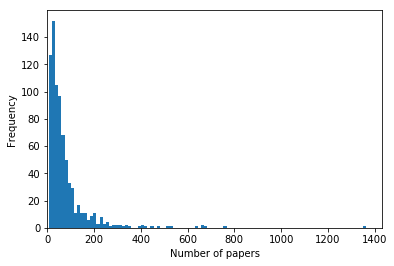

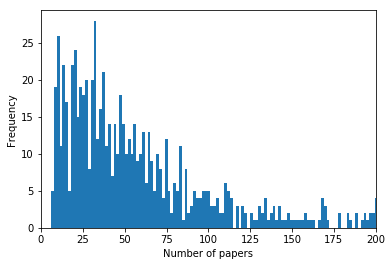

In [19]:
ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=100)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

ax = d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().plot(kind="hist",bins=800)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0,xmax=200)
plt.xlabel("Number of papers")
ax.legend().remove()
plt.show()

In [10]:
d_train.data[["chapter","conference_name"]].groupby(["conference_name"]).count().sort_values(by="chapter", ascending=False)

,chapter
conference_name,
International Conference on Human-Computer Interaction,1364
International Conference on Computational Science and Its Applications,763
Asian Conference on Computer Vision,683
"International Conference of Design, User Experience, and Usability",661
International Conference on Intelligent Computing,658
International Conference on Universal Access in Human-Computer Interaction,632
European Conference on Parallel Processing,526
European Conference on Computer Vision,509
International Conference on Neural Information Processing,480


In [11]:
d_train.data[d_train.data.conference_name == "International Conference on Human-Computer Interaction"][["chapter_title","conference_year"]]

,chapter_title,conference_year
6,Cross Cultural Design Considerations in HealthCare,2013
103,Mapping Peace Ideas around the Table,2013
134,Exploring the Impact of School Culture on School\u2019s Internet Safety Policy Development,2013
140,Modeling the Portfolio Selection Problem with Constraint Programming,2013
182,A GUI for Modeling Regular Constraints,2013
187,Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map,2013
197,"Interaction in Distance Education: Student, Teaching Material, Information Technology and Communication",2013
198,Choosing and Using a Common Book in an Undergraduate Research Experience,2013
201,Impression Management Support System for Teachers in Computer-Mediated Communication,2013
203,Interactive Screening for Learning Difficulties: Analyzing Visual Patterns of Reading Arabic Scripts with Eye Tracking,2013


# Conference vs. Conference series

In [42]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conferenceseries").count().reset_index() \
    .merge(df,on=["conferenceseries","conferenceseries"]) \
    .sort_values(by=["conference_x","conferenceseries"],ascending=False)

,conferenceseries,conference_x,conference_y
827,<http://scigraph.springernature.com/things/conference-series/9329e9807c553fe2df23a37b79d190a0>,5,<http://scigraph.springernature.com/things/conferences/49854bb206cdffce78c514a0dd67d16a>
828,<http://scigraph.springernature.com/things/conference-series/9329e9807c553fe2df23a37b79d190a0>,5,<http://scigraph.springernature.com/things/conferences/a9c5d253cf4b4e2005aff52c4018611a>
829,<http://scigraph.springernature.com/things/conference-series/9329e9807c553fe2df23a37b79d190a0>,5,<http://scigraph.springernature.com/things/conferences/186e76358fa4fe19d5f4430ea51bc5cd>
830,<http://scigraph.springernature.com/things/conference-series/9329e9807c553fe2df23a37b79d190a0>,5,<http://scigraph.springernature.com/things/conferences/bb765d7417f50b2a6ed2456733635791>
831,<http://scigraph.springernature.com/things/conference-series/9329e9807c553fe2df23a37b79d190a0>,5,<http://scigraph.springernature.com/things/conferences/2c3ee44dba7fef3dead4b1ba8d4ab00c>
674,<http://scigraph.springernature.com/things/conference-series/7ad46a0d36867e552414c0c3996a411f>,5,<http://scigraph.springernature.com/things/conferences/d25c05149f1fd671b5bd51f607474e56>
675,<http://scigraph.springernature.com/things/conference-series/7ad46a0d36867e552414c0c3996a411f>,5,<http://scigraph.springernature.com/things/conferences/02e55196be5813c66e1abfb6d9ab9f1c>
676,<http://scigraph.springernature.com/things/conference-series/7ad46a0d36867e552414c0c3996a411f>,5,<http://scigraph.springernature.com/things/conferences/d65425164405a436b411904e356cc6a6>
677,<http://scigraph.springernature.com/things/conference-series/7ad46a0d36867e552414c0c3996a411f>,5,<http://scigraph.springernature.com/things/conferences/cce3228e367d208f03b4f65c633e037f>
678,<http://scigraph.springernature.com/things/conference-series/7ad46a0d36867e552414c0c3996a411f>,5,<http://scigraph.springernature.com/things/conferences/6e1b8a94dd1daf692c2c896bed825339>


# Conference name vs. Conferenceseries

In [66]:
df = d_train.data[["conference","conferenceseries"]].drop_duplicates()
df.groupby("conference").count().reset_index() \
    .merge(df,on=["conference","conference"],how="left") \
    .sort_values(by=["conferenceseries_x","conference"],ascending=False)

,conference,conferenceseries_x,conferenceseries_y
1408,<http://scigraph.springernature.com/things/conferences/ffef8a49796b38e5100821e41ccfe86f>,1,<http://scigraph.springernature.com/things/conference-series/a1e12594e9611aee519474fa5795d482>
1407,<http://scigraph.springernature.com/things/conferences/ff89a6569ca062c819888d121a9a75e4>,1,<http://scigraph.springernature.com/things/conference-series/c31938229d609335077a9d50c444cf88>
1406,<http://scigraph.springernature.com/things/conferences/ff4f283c7fb897631432a6dad3c1d9a5>,1,<http://scigraph.springernature.com/things/conference-series/0e6ecc22632dbc2d6a19eea1e0ec0415>
1405,<http://scigraph.springernature.com/things/conferences/ff3d3606f647e9ae3c029b0913c8c458>,1,<http://scigraph.springernature.com/things/conference-series/914754c1ab56fcd8a2fa97cd716b2aa5>
1404,<http://scigraph.springernature.com/things/conferences/fefe41269426e14252f56236977ca5af>,1,<http://scigraph.springernature.com/things/conference-series/027f273bdac97734f63bde4cbdd92c85>
1403,<http://scigraph.springernature.com/things/conferences/fee990de94958f12f92e96f20e2587a4>,1,<http://scigraph.springernature.com/things/conference-series/b50170d73aaed25b0f019e8a2e3c37a9>
1402,<http://scigraph.springernature.com/things/conferences/fee671508af6df5a5dc1fcc7bb0e5665>,1,<http://scigraph.springernature.com/things/conference-series/4f0930ab7f7984497558edd68e70de8c>
1401,<http://scigraph.springernature.com/things/conferences/fee652fe4b2604468389a32d6cd34572>,1,<http://scigraph.springernature.com/things/conference-series/aea58fc22d78aff032fd15f41c827586>
1400,<http://scigraph.springernature.com/things/conferences/feb4d05fc463155c976731f13fbfd6ad>,1,<http://scigraph.springernature.com/things/conference-series/f2d3fb55e52302923a0fcd7422025bdc>
1399,<http://scigraph.springernature.com/things/conferences/fe77c8b7a92655664e5f907e1e3f65ae>,1,<http://scigraph.springernature.com/things/conference-series/e72e6d32da9c5906601268e29b8c0f48>
